# CA1: Visualizing features of breast cancer samples

**Please note that this assignment may be completed in groups.**

---
In this assignment, we'll be loading, describing, and visualizing the [Wisconsin Breast Cancer Diagnosis Dataset][1]

This is a well-known dataset that has been explored and discussed quite a bit:
- [discussion and examples on kaggle][2]
- [Medium article similar to this assignment][3]

Goals are as follows:

- Become more comfortable with the Jupyter notebook format
- Explore common data exploration and visualization techniques
- Review  datasets for model development
- Consider which techniques are most useful for specific healthcare datasets

We'll begin by importing a few required libraries using an `import` statement. Each of them extends the basic functionality of Python. By importing `as X` (e.g. `as np`), we can shorten subsequent calls to the library in our code.

- `numpy` for efficient math operations
- `pandas` for dataframes and dataframe operations
- `matplotlib` for visualization/plotting
- `sklearn` will give us a convenient way to load our dataset. In later assignments, we'll also be using this library to define models, train them, and evaluate their performance.

**Note** that there are many libraries for visualization and plotting in Python. For this assignment, we'll go with the one that's *simplest* to use -- `matplotlib` -- rather than the one that gives us the *prettiest* figures (e.g. `seaborn`, `plotly`).

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
[2]: https://www.kaggle.com/shubamsumbria/breast-cancer-prediction
[3]: https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We can now use `sklearn` to load the dataset we'll be working with. Typically you might load from `.csv` with `pd.read_csv()`, from `.xlsx` with `pd.read_excel()`, and so on, but the result would be the same: you'd end up with a `pandas` dataframe. In this case, `sklearn` gives us a nice way to load this dataframe without having to find and download a `.csv` file on our own.

In [2]:
from sklearn.datasets import load_breast_cancer
df, y = load_breast_cancer(return_X_y=True, as_frame=True)

We now have two objects: a dataframe `df` of predictors, and a single *series* (i.e. column) `y` of the associated outcomes. In this dataset, the possible outcomes are *Malignant*, indicated with a 0, versus *Benign*, indicated with a 1. Let's use the `.head()` method of our `pandas` dataframe `df` to take a look at its first few rows. Since we have 30 features in total, `df` is too wide to fit on the page. Still, this initial step is helpful to give us an initial glimpse of the data and check that it's been imported correctly.

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now that we've seen our features, let's take a look at our outcomes. We can first use `.value_counts()` to count occurrences of distinct values in `y`:

In [4]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

We can make this easier to interpret by first replacing the ones to 'Benign' and the zeroes to 'Malignant' using `.replace()`...

In [5]:
y.replace({0: 'Malignant', 1: 'Benign'}).value_counts()

Benign       357
Malignant    212
Name: target, dtype: int64

...but it'll be even easier to understand if we plot the result instead. In this case, we can use the `.plot()` method, which will allow us to plot the value counts as a bar plot with `kind='bar'`. We're implicitly using `matplotlib` to do the heavy lifting here, so we'll use a few `matplotlib` methods (`.ylabel()` and `.show()`) to add a y-axis label and display the plot.

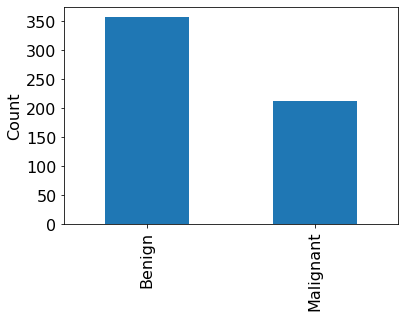

In [6]:
y.replace({0: 'Malignant', 1: 'Benign'}).value_counts().plot(kind='bar', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

## Question 1
In this dataset, which was collected at the University of Wisconsin, we see that the majority (about 63%) of the samples are benign. We can think of this as the *baseline rate*, or *prevalence*. If a similar data collection took place at Duke, would you expect this rate to be similar? Why or why not, and what factors are relevant? Please respond in one brief paragraph (approx. 3-4 sentences).

---

Let's now take a look at some descriptive statistics for each of our 30 features. We can do this with the `.describe()` method provided by `pandas`. We'll also transpose the result with `.T` to make it more readable, is it would otherwise be too wide to fit on the page. Note that 25%, 50% (the median), and 75% define the quartiles, and the inter-quartile range may be calculated by subtracting the 25% value from the 75% value.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In addition to the descriptive statistics, we need to check how many missing values are present in each of the columns. We can do this with the `.isna()` method, which returns a new dataframe in which NA and non-NA values in `df` have been replaced with ones and zeroes, respectively. We can then take the `.sum()` of the columns in `df.isna()` to see how many NA values are present in each column.

In [8]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Question 2
From the above, we can see that there are *zero* missing values in our dataset! This makes our job much easier: we won't have to worry about imputing any values. In your experience, is it common for a healthcare dataset to have zero missing values? Why or why not? If possible, please explain by including a dataset you've worked with as an example. Please respond in one brief paragraph (approx. 3-4 sentences).

---

We're now ready to visualize our features! We'll use what is likely the most common and useful tool in all of data visualization -- the histogram -- to understand how each feature is distributed and compare its distribution between benign and malignant samples. The code block below is a bit more involved than our previous blocks, but the central portion of the code is the `.hist()` method, which plots histograms for *each* of the features in `df`. We first plot histograms for the malignant group by using `df[y == 0]` to select only those rows where our outcome `y` is 0 (i.e. malignant). We can then superimpose histograms for the benign group by applying `.hist()` to `df[y == 1]`. The remaining code is used to control figure aesthetics, as detailed in the in-line comments below.

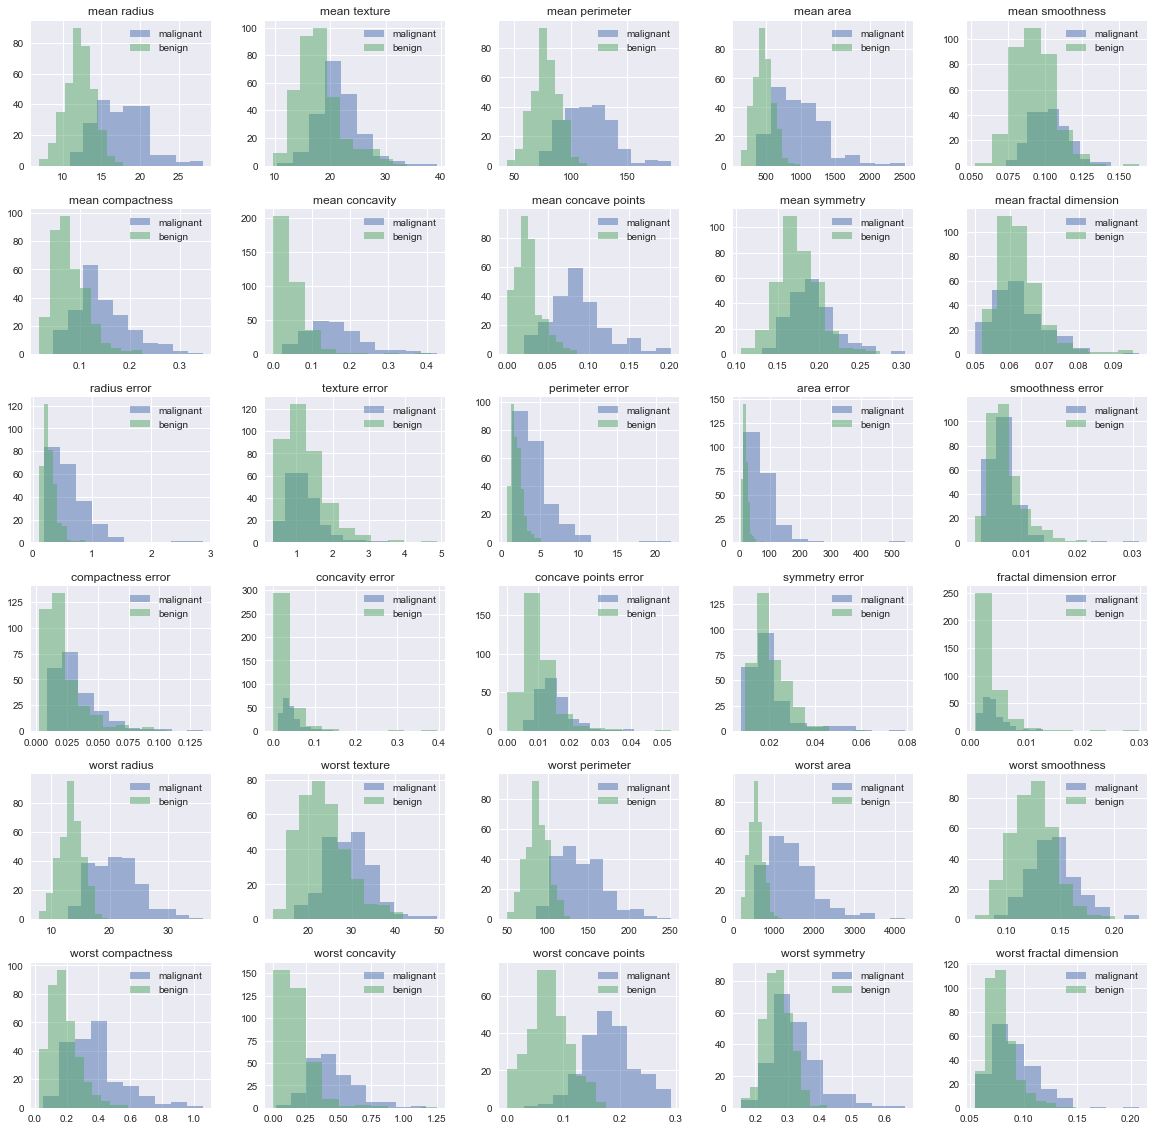

In [9]:
plt.style.use('seaborn')             # pick the seaborn style to make the plots prettier

ax = df[y == 0].hist(
    figsize=(20, 20),                # specify the size of the figure
    alpha=.5,                        # make histograms semi-transparent
    label='malignant'                # tell our plot legend that this is the malignant group
)

df[y == 1].hist(
    alpha=.5,
    ax=ax,                           # plot on the same set of axes created by our previous call to .hist()
    label='benign'                   # tell our plot legend that this is the benign group
)

[b.legend() for a in ax for b in a]  # turn on the legend for all figures concisely by using a list comprehension
plt.show()

## Question 3
Based on the histograms above, do you believe these features can be used to predict whether the samples are benign or malignant with high accuracy? Please explain why or why not in one brief paragraph (approx. 3-4 sentences). In your answer, you should refer to specific characteristics of one or more of the histograms. In the next computational assignment, you'll get to see whether your hypothesis is correct!

---

Next, we'll compute the (pearson) correlation between each feature and the outcomes `y` using the `.corrwith()` method, then plot the result as a bar graph. Most of this code is similar to the code we used to plot the values of `y`, with the key difference being the use of `.corrwith()`. Together with the grouped histograms above, these plots provide some clues about the feasibility of predicting `y` based on the features in `df`.

In [ ]:
df.corrwith(y).plot(kind='bar', figsize=(20, 8), ylim=[-1, 1], fontsize=20)
plt.ylabel('correlation with cancer status', fontsize=20)
plt.show()

In addition to the correlations between `y` and each of the features in `df`, we may be interested in correlations between pairs of features in `df`. Using the `.corr()` method, we can compute the correlation between all such pairs. The other key portion of the code below is `matplotlib`'s `.matshow()` method, which plots the correlation coefficients as a heatmap. This makes it easier to quickly identify which pairs are strongly versus weakly correlated. Using the `'RdBu'` color scheme we've selected, correlations close to 1 are dark blue, correlations close to -1 are dark red, and correlations close to zero are light/white colored.

In [ ]:
plt.figure(figsize=(20, 20))         # specify the size of the figure

plt.matshow(
    df.corr(),
    cmap='RdBu',                     # use the red-blue colormap to show negative (positive) values as red (blue)
    vmin=-1.,                        # specify that -1 is the minimum possible value so that -1 will be dark red
    vmax=1.,                         # specify that 1 is the maximum possible value so that 1 will be dark blue
    fignum=0                         # this forces .matshow() to plot on the figure we've already created
)

plt.grid(None)                       # turn off gridlines

plt.yticks(np.arange(len(df.columns)), df.columns, fontsize=20)                # show feature names as y-ticks
plt.xticks(np.arange(len(df.columns)), df.columns, fontsize=20, rotation=90)   # show feature names as x-ticks

plt.show()

## Question 4
In this assignment, we've explored some basic descriptive statistics and visualizations that are useful when getting oriented to a new dataset. However, there are many more visualizations and statistics we have not considered! In one brief paragraph (approx. 3-4 sentences), please describe 1-2 additional data exploration or visualization techniques that you have found useful or believe would be useful in a specific healthcare application. These techniques could be either (a) applicable to *any* dataset, or (b) designed for a specific kind of data encountered in a clinical or healthcare setting.